## 作業

1. 如何使用已經訓練好的模型？
2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？





In [ ]:
# 查看 GPU
!nvidia-smi 

Tue Aug 18 23:04:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 連結 Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 匯入套件

In [ ]:
import os
import subprocess
from PIL import Image  
import warnings
warnings.filterwarnings( 'ignore' )

# 確保 Colob 中使用的 TensorFlow 是 1.x 版本而不是 TensorFlow 2
try:
    %tensorflow_version 1.x 
except Exception:
    pass

import tensorflow as tf 

# 需要安裝 Keras 2.2.4 的版本
!pip install keras==2.2.4
import keras
print( '\nTensorFlow 的版本:', tf.__version__ )
print( 'Keras 的版本:', keras.__version__ )

TensorFlow 1.x selected.
     |████████████████████████████████| 317kB 5.4MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1

TensorFlow 的版本: 1.15.2
Keras 的版本: 2.2.4


Using TensorFlow backend.


# 下載 YOLO V3 程式碼

In [ ]:
# 指定工作目錄
os.chdir( '/content/gdrive/My Drive' )

# 下載程式碼
if not os.path.exists( "keras-yolo3" ):
    print( "YOLO V3 code doesn't exist, downloading..." )
    !git clone https://github.com/qqwweee/keras-yolo3
    os.chdir('/content/gdrive/My Drive/keras-yolo3' ) 
else:  
    print( "YOLO V3 code exists." )
    os.chdir('/content/gdrive/My Drive/keras-yolo3')

YOLO V3 code exists.


# 讀取並顯示範例圖片

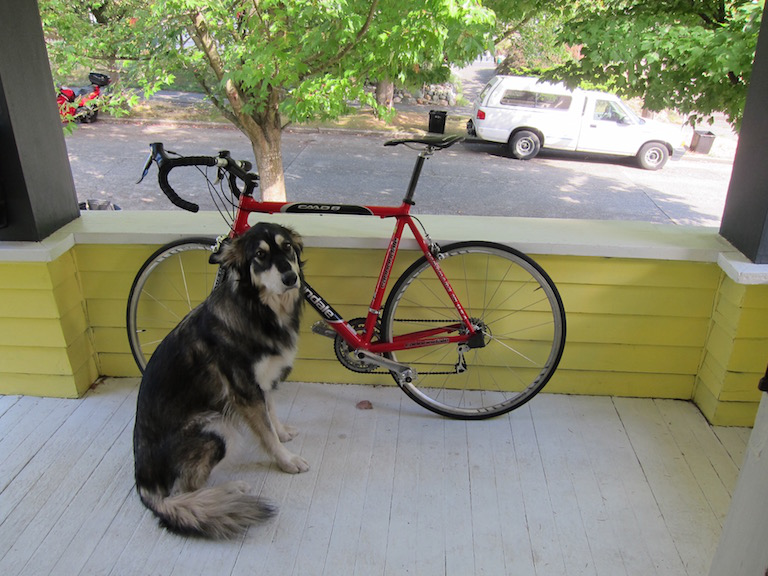

In [ ]:
image = Image.open( 'dog.jpg' ) 
image

In [ ]:
from yolo import YOLO

In [ ]:
yolo_model = YOLO( model_path='logs/trained_model/trained_weights_final.h5', classes_path='model_data/voc_classes.txt' )
r_image = yolo_model.detect_image(image)













logs/trained_model/trained_weights_final.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(416, 416, 3)
Found 1 boxes for img
car 0.47 (480, 95) (661, 177)
8.623159337000004


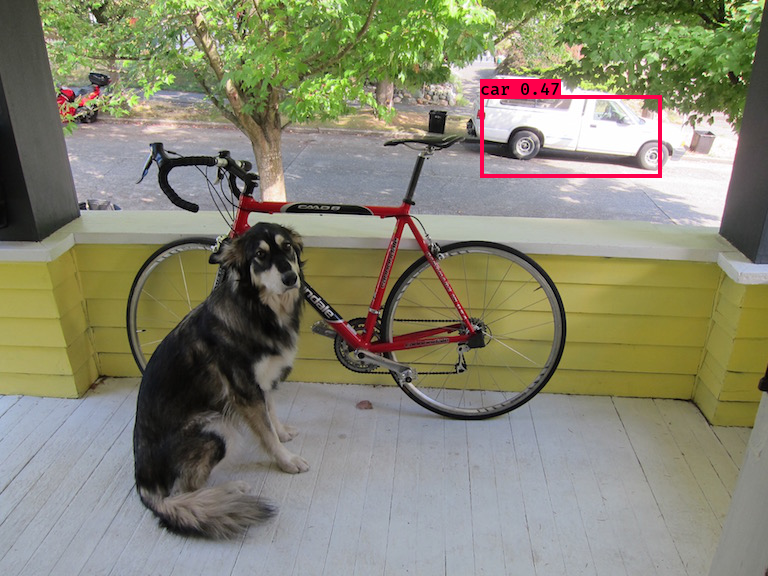

In [ ]:
r_image

# 訓練模型的資料集格式

每一筆資料的資訊有: 
圖片路徑 左上角 $(x,y)$,右下角 $(x,y)$,類別索引  ...   

In [ ]:
with open( '2007_train.txt', 'r' ) as f:
  d = f.readlines()
d

['./VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6\n',
 './VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12\n',
 './VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14\n',
 './VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6\n',
 './VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14\n',
 './VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0\n',
 './VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18\n',
 './VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14\n',
 './VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11\n',
 './VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18\n',
 './VOCdevkit/VOC2007/JPEGImages/000044.jpg 1,1,370,330,8 99,101,312,213,7\n',
 './VOCdevkit/VOC2007/JPEGImages/000047.jpg 15